<a href="https://colab.research.google.com/github/Umercia/wind_power/blob/master/wind_farm_power_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# mount drive from MyGoogleDrive
from google.colab import drive  
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1.0 Import DATA


## 1.1 Import MERRA DATA

In [0]:
# importing
path = "/content/gdrive/My Drive/Colab Notebooks/wind_power/data/"
filename = "MERRA2_N48.000_E001.250.txt"
file_path = path + filename
merra_df = pd.read_csv(file_path, 
                 sep = r"	", 
                 skiprows= 24, 
                 index_col='TimeStamp', 
                 parse_dates=True)
merra_df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2,3,10,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,MeanWindSpeedUID_50.0m|Mean wind speed|L-1.00|U75.00,DirectionUID_50.0m|Wind direction|L0.00|U360.00,TemperatureUID_50.0m|Temperature|L-50.00|U60.00,Comment_50.0m,TimeStampStatus_50.0m,SampleStatus_50.0m,DataStatus_MeanWindSpeedUID_50.0m,DataStatus_DirectionUID_50.0m,DataStatus_TemperatureUID_50.0m,TemperatureUID_10.0m|Temperature|L-50.00|U60.00,Comment_10.0m,TimeStampStatus_10.0m,SampleStatus_10.0m,DataStatus_TemperatureUID_10.0m,PressureUID_2.0m|Pressure|L800.00|U1500.00,Comment_2.0m,TimeStampStatus_2.0m,SampleStatus_2.0m,DataStatus_PressureUID_2.0m,Unnamed: 20
TimeStamp,,,,,,,,,,,,,,,,,,,,
NaT,[m/s],[Degrees],[Deg C],NaN,NaN,NaN,NaN,NaN,NaN,[Deg C],NaN,NaN,NaN,NaN,[hPa],NaN,NaN,NaN,NaN,NaN
2001-01-01 00:00:00,9.96,177.8,0.7,NaN,0.0,0.0,0.0,0.0,0.0,1.2,NaN,0.0,0.0,0.0,98546.4,NaN,0.0,0.0,4.0,NaN
2001-01-01 01:00:00,10.42,185.0,1.1,NaN,0.0,0.0,0.0,0.0,0.0,1.7,NaN,0.0,0.0,0.0,98469.1,NaN,0.0,0.0,4.0,NaN
2001-01-01 02:00:00,13.03,195.6,2.4,NaN,0.0,0.0,0.0,0.0,0.0,3.0,NaN,0.0,0.0,0.0,98381.8,NaN,0.0,0.0,4.0,NaN
2001-01-01 03:00:00,13.47,196.4,2.7,NaN,0.0,0.0,0.0,0.0,0.0,3.3,NaN,0.0,0.0,0.0,98298.5,NaN,0.0,0.0,4.0,NaN


In [0]:
# columns selection and renaming
selection = ['MeanWindSpeedUID_50.0m|Mean wind speed|L-1.00|U75.00', 
             'DirectionUID_50.0m|Wind direction|L0.00|U360.00',
             'TemperatureUID_50.0m|Temperature|L-50.00|U60.00',
             'TemperatureUID_10.0m|Temperature|L-50.00|U60.00',
             'PressureUID_2.0m|Pressure|L800.00|U1500.00'            
            ]

merra_df = merra_df.loc["2001-01-01 00:00:00":, selection]
merra_df.index.names = ["time_stamp"]
merra_df.columns = ["ws_avg_50m", 
                    "dir_agv_50m", 
                    "temp_avg_50m", 
                    "temp_avg_10m", 
                    "pres_avg_2m"]

# convert to numeric
merra_df = merra_df.apply(pd.to_numeric, errors='coerce')

merra_df.head()

,ws_avg_50m,dir_agv_50m,temp_avg_50m,temp_avg_10m,pres_avg_2m
time_stamp,,,,,
2001-01-01 00:00:00,9.96,177.8,0.7,1.2,98546.4
2001-01-01 01:00:00,10.42,185.0,1.1,1.7,98469.1
2001-01-01 02:00:00,13.03,195.6,2.4,3.0,98381.8
2001-01-01 03:00:00,13.47,196.4,2.7,3.3,98298.5
2001-01-01 04:00:00,13.38,196.2,2.6,3.2,98266.9


In [0]:
#convert type and pass time_stapmp to index
# cols = merra_df.columns.drop("time_stamp")

# merra_df["time_stamp"] = df2["time_stamp"].apply(pd.to_datetime, errors='coerce')
# merra_df.set_index(["time_stamp"], inplace=True)


In [0]:
merra_df.dtypes

ws_avg_50m      float64
dir_agv_50m     float64
temp_avg_50m    float64
temp_avg_10m    float64
pres_avg_2m     float64
dtype: object

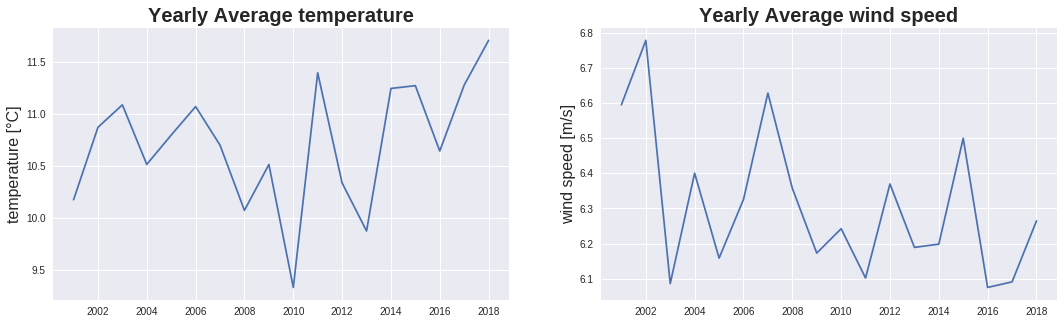

In [0]:
# plot yearly average
yearly_df = merra_df.resample("AS").mean()


plt.figure(figsize=(18,5))
plt.subplot(1, 2, 1)
plt.plot(yearly_df.index, yearly_df["temp_avg_50m"])
plt.title("Yearly Average temperature", fontweight="bold", size=20)
plt.ylabel("temperature [°C]", size=16)

plt.subplot(1, 2, 2)
plt.plot(yearly_df.index, yearly_df["ws_avg_50m"])
plt.title("Yearly Average wind speed", fontweight="bold", size=20)
plt.ylabel("wind speed [m/s]", size=16)

plt.show()

In [0]:
import plotly.plotly as py
import plotly.graph_objs as go
import ipywidgets as widgets
from scipy import special

In [0]:
#source: https://plot.ly/python/range-slider/

trace = go.Scatter(x=list(merra_df.index),
                   y=list(merra_df["temp_avg_50m"]))

data = [trace]
layout = dict(
    title='Time series with range slider and selectors',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(count=1,
                    label='YTD',
                    step='year',
                    stepmode='todate'),
                dict(count=1,
                    label='1y',
                    step='year',
                    stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)

fig = dict(data=data, layout=layout)
py.iplot(fig)

/usr/local/lib/python3.6/dist-packages/plotly/plotly/plotly.py:230: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:
(1) Use the `plotly.graph_objs.Scattergl` trace object to generate a WebGl graph.
(2) Trying using the image API to return an image instead of a graph URL
(3) Use matplotlib
(4) See if you can create your visualization with fewer data points

If the visualization you're using aggregates points (e.g., box plot, histogram, etc.) you can disregard this warning.



The draw time for this plot will be slow for all clients.


/usr/local/lib/python3.6/dist-packages/plotly/api/v1/clientresp.py:40: UserWarning:

Estimated Draw Time Too Long



## 1.2 Import ERA DATA

In [126]:
# importing
path = "/content/gdrive/My Drive/Colab Notebooks/wind_power/data/"
filename = "ERA5_N48.196702_E001.60000.txt"
file_path = path + filename

era_df = pd.read_csv(file_path, 
                     sep = r"	", 
                     skiprows= 32,
                     index_col='TimeStamp', 
                     parse_dates=True)


era_df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2,8,9,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,MeanWindSpeedUID_10.0m|Mean wind speed|L-1.00|U75.00,DirectionUID_10.0m|Wind direction|L0.00|U360.00,Comment_10.0m,TimeStampStatus_10.0m,SampleStatus_10.0m,DataStatus_MeanWindSpeedUID_10.0m,DataStatus_DirectionUID_10.0m,MeanWindSpeedUID_100.0m|Mean wind speed|L-1.00|U75.00,DirectionUID_100.0m|Wind direction|L0.00|U360.00,Comment_100.0m,...,DataStatus_MeanWindSpeedUID_100.0m,DataStatus_DirectionUID_100.0m,TemperatureUID_2.0m|Temperature|L-50.00|U60.00,PressureUID_2.0m|Pressure|L800.00|U1500.00,Comment_2.0m,TimeStampStatus_2.0m,SampleStatus_2.0m,DataStatus_TemperatureUID_2.0m,DataStatus_PressureUID_2.0m,Unnamed: 22
TimeStamp,,,,,,,,,,,,,,,,,,,,,
NaT,[m/s],[Degrees],NaN,NaN,NaN,NaN,NaN,[m/s],[Degrees],NaN,...,NaN,NaN,[Deg C],[hPa],NaN,NaN,NaN,NaN,NaN,NaN
2001-01-01 00:00:00,7.17,183.1,NaN,0.0,0.0,0.0,0.0,11.67,185.3,NaN,...,0.0,0.0,2.8,987.0,NaN,0.0,0.0,0.0,0.0,NaN
2001-01-01 01:00:00,7.16,186.1,NaN,0.0,0.0,0.0,0.0,12.00,188.9,NaN,...,0.0,0.0,2.9,986.1,NaN,0.0,0.0,0.0,0.0,NaN
2001-01-01 02:00:00,7.69,187.5,NaN,0.0,0.0,0.0,0.0,12.73,190.3,NaN,...,0.0,0.0,3.6,985.3,NaN,0.0,0.0,0.0,0.0,NaN
2001-01-01 03:00:00,7.87,186.8,NaN,0.0,0.0,0.0,0.0,13.08,190.2,NaN,...,0.0,0.0,3.9,984.3,NaN,0.0,0.0,0.0,0.0,NaN


In [127]:
era_df.columns

Index(['MeanWindSpeedUID_10.0m|Mean wind speed|L-1.00|U75.00',
       'DirectionUID_10.0m|Wind direction|L0.00|U360.00', 'Comment_10.0m',
       'TimeStampStatus_10.0m', 'SampleStatus_10.0m',
       'DataStatus_MeanWindSpeedUID_10.0m', 'DataStatus_DirectionUID_10.0m',
       'MeanWindSpeedUID_100.0m|Mean wind speed|L-1.00|U75.00',
       'DirectionUID_100.0m|Wind direction|L0.00|U360.00', 'Comment_100.0m',
       'TimeStampStatus_100.0m', 'SampleStatus_100.0m',
       'DataStatus_MeanWindSpeedUID_100.0m', 'DataStatus_DirectionUID_100.0m',
       'TemperatureUID_2.0m|Temperature|L-50.00|U60.00',
       'PressureUID_2.0m|Pressure|L800.00|U1500.00', 'Comment_2.0m',
       'TimeStampStatus_2.0m', 'SampleStatus_2.0m',
       'DataStatus_TemperatureUID_2.0m', 'DataStatus_PressureUID_2.0m',
       'Unnamed: 22'],
      dtype='object')

In [128]:
# columns selection and renaming
selection = ['MeanWindSpeedUID_10.0m|Mean wind speed|L-1.00|U75.00', 
             'DirectionUID_10.0m|Wind direction|L0.00|U360.00',
             'MeanWindSpeedUID_100.0m|Mean wind speed|L-1.00|U75.00',
             'DirectionUID_100.0m|Wind direction|L0.00|U360.00',
             'TemperatureUID_2.0m|Temperature|L-50.00|U60.00'         
            ]


era_df = era_df.loc["2001-01-01 00:00:00":, selection]
era_df.index.names = ["time_stamp"]
era_df.columns = ["ws_avg_10m", 
                   "dir_agv_10m", 
                   "ws_avg_100m", 
                   "dir_agv_100m",  
                   "temp_avg_2m"]

era_df = era_df.apply(pd.to_numeric, errors='coerce')
era_df.head()

,ws_avg_10m,dir_agv_10m,ws_avg_100m,dir_agv_100m,temp_avg_2m
time_stamp,,,,,
2001-01-01 00:00:00,7.17,183.1,11.67,185.3,2.8
2001-01-01 01:00:00,7.16,186.1,12.00,188.9,2.9
2001-01-01 02:00:00,7.69,187.5,12.73,190.3,3.6
2001-01-01 03:00:00,7.87,186.8,13.08,190.2,3.9
2001-01-01 04:00:00,7.85,183.6,13.02,186.4,4.5


In [129]:
era_df.describe()

,ws_avg_10m,dir_agv_10m,ws_avg_100m,dir_agv_100m,temp_avg_2m
count,157776.000000,157776.000000,157776.000000,157776.000000,157776.000000
mean,3.960144,182.592229,6.444396,182.652849,11.634492
std,1.939454,105.365883,2.898294,104.494571,7.294128
min,0.000000,0.000000,0.010000,0.000000,-16.800000
25%,2.500000,73.100000,4.430000,74.600000,6.500000
50%,3.650000,208.500000,6.230000,209.100000,11.400000
75%,5.090000,259.900000,8.140000,259.800000,16.600000
max,15.980000,359.900000,23.780000,359.900000,39.400000


## 1.3 Wind turbines DATA 




### 1.3.1 Import

In [0]:
# lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
# importing
input_path = "/content/gdrive/My Drive/Colab Notebooks/wind_power/data/0.input_files/"

li = []
for file_name in os.listdir(input_path):
    file_path = input_path + file_name
    df = pd.read_csv(file_path,
                             index_col='Date', 
                             parse_dates=True)
    df["wtg"] = file_name[5:9]
    li.append(df)
wtg_df = pd.concat(li, axis=0)


# convert local wtg local time to GMT 
ts = pd.Series(wtg_df.index)
ts_GTM = ts.dt.tz_localize("Europe/Paris",ambiguous = 'infer').dt.tz_convert("GMT")
wtg_df.index = ts_GTM
del ts, ts_GTM


# add wtg to index
wtg_df.set_index(["wtg", wtg_df.index], inplace=True)
wtg_df.head(3)


# feature selection and renaming
selection = {
    'Amb_WindSpeed_Avg-SQL-10minAvg': "ws_avg",
    'Amb_WindSpeed_Std-SQL-10minAvg': "ws_std",
    'Amb_WindDir_Abs_Avg-SQL-10minAvg': "wd_avg",
    'Grd_Prod_Pwr_Avg-SQL-10minAvg': "pwr_avg",
    'Sys_Logs_FirstActAlarmNo-SQL-10minAvg': "firt_ala",
    'Amb_Temp_Avg-SQL-10minAvg': "temp_avg",
    'KPIS_10MIN-SOKTIME': "ok_time",
    'Blds_PitchAngle_Avg-SQL-10minAvg':"pitch_avg",
    'Rtr_RPM_Avg-SQL-10minAvg':"rpm_avg"
    }

wtg_df = wtg_df.loc[:,selection.keys()]             # col selection
wtg_df.rename(columns=selection, inplace=True)      # rename col
wtg_df = wtg_df.apply(pd.to_numeric, errors='coerce')   # convert to numeric
wtg_df.head(3)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3,5,6,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


ws_avg  ws_std  wd_avg  pwr_avg  firt_ala  \
wtg  Date                                                                   
WT13 2012-12-31 23:10:00+00:00    11.0     1.3     NaN     2663       NaN   
     2012-12-31 23:20:00+00:00    10.8     1.3   166.0     2655       0.0   
     2012-12-31 23:30:00+00:00    11.1     1.4   166.0     2732       0.0   

                                temp_avg  ok_time  pitch_avg  rpm_avg  
wtg  Date                                                              
WT13 2012-12-31 23:10:00+00:00       NaN        0        NaN      NaN  
     2012-12-31 23:20:00+00:00       7.0      600       -1.7     16.0  
     2012-12-31 23:30:00+00:00       7.0      600       -1.4     16.0

### 1.3.2 cleaning 

#### 1.3.2.1 outlier based on min/max

In [5]:
# strong outlier removal: based on min / max values.

min_max_dic = {
          "ws_avg": (0, 50),
          "ws_std": (0, 7),
          "wd_avg": (0, 360),
          "pwr_avg": (-100, 4000),
          "temp_avg": (-20 , 40),
          "ok_time": (0, 600),
          "pitch_avg": (-10, 90),
          "rpm_avg": (0, 20)
      }

def clean(df_in, min_max_dic, inplace=True):
    """set outliers value to NaN
        Inputs: 
            - df_in: data frame to clean
            - min_max_dic: dictionary where: 
                key: feature_name
                item: tuple (min, max)
        Output:
            df_out: data frame"""
        
    if (inplace == True):
        df_out = df_in
    elif (inplace == False):
        df_out = df_in.copy()
      
    print("Points set to NaN because outside min/max:")
    print('feature\t\t\tn_point\t\tpercentage\tmin\t\tmax')
    print(70*"_")
    for key, item in min_max_dic.items():   
        mask = ((df_out[key] < min_max_dic[key][0]) | 
                (df_out[key] > min_max_dic[key][1]))
        df_out.loc[mask, key] = np.NaN
        
        if mask.sum() > 0:
            print("{:<12}\t\t\t{}\t\t{:.2%}\t\t{}\t\t{}".format(key, 
                                                     mask.sum(), 
                                                     mask.sum()/mask.size,
                                                     min_max_dic[key][0],
                                                     min_max_dic[key][1]))  
    return df_out

wtg_df = clean(wtg_df, min_max_dic)

Points set to NaN because outside min/max:
feature			n_point		percentage	min		max
______________________________________________________________________
ws_avg			45		0.00%		0		50
ws_std			5		0.00%		0		7
wd_avg			18594		0.74%		0		360
temp_avg			113		0.00%		-20		40
pitch_avg			498		0.02%		-10		90
rpm_avg			637		0.03%		0		20


#### 1.3.2.2 filtering based on runtime and alarm logs

/usr/local/lib/python3.6/dist-packages/pandas/core/computation/expressions.py:179: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


(0, 25)

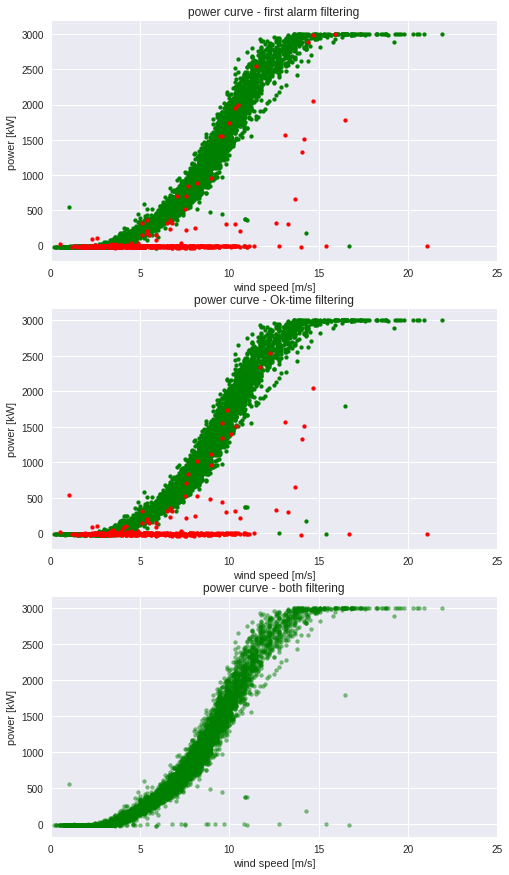

In [6]:
# power curve -filter test

mask1 = wtg_df["ok_time"] == 600
mask2 = wtg_df["firt_ala"] == 0

wtg_df["filt_ok_time"] = 0
wtg_df.loc[mask1, "filt_ok_time"] = 1

wtg_df["filt_firt_ala"] = 0
wtg_df.loc[mask2, "filt_firt_ala"] = 1

# Inputs
X = wtg_df.sample(n=10000, random_state=10)
mask_fil_ala = (X['filt_firt_ala'] == 1)
mask_fil_runt = (X['filt_ok_time'] == 1)


# Plot
plt.figure(figsize=(8, 15))

plt.subplot(3, 1, 1)
plt.scatter(x='ws_avg', y='pwr_avg', data=X.loc[mask_fil_ala,:],s=15, alpha=1, c="g")
plt.scatter(x='ws_avg', y='pwr_avg', data=X.loc[~mask_fil_ala,:],s=15, alpha=1, c="r")
plt.title("power curve - first alarm filtering")
plt.xlabel("wind speed [m/s]")
plt.ylabel("power [kW]")
plt.xlim(0,25)

plt.subplot(3, 1, 2)
plt.scatter(x='ws_avg', y='pwr_avg', data=X.loc[mask_fil_runt,:],s=15, alpha=1, c="g")
plt.scatter(x='ws_avg', y='pwr_avg', data=X.loc[~mask_fil_runt,:],s=15, alpha=1, c="r")           
plt.title("power curve - Ok-time filtering")
plt.xlabel("wind speed [m/s]")
plt.ylabel("power [kW]")
plt.xlim(0,25)
plt.xlim(0,25)

plt.subplot(3, 1, 3)

plt.scatter(x='ws_avg', y='pwr_avg', data=X.loc[mask_fil_ala + mask_fil_runt,:], s=15, alpha=0.5, c = "green" )
plt.title("power curve - both filtering")
plt.xlabel("wind speed [m/s]")
plt.ylabel("power [kW]")
plt.xlim(0,25)

#### 1.3.2.3 outliers with dbscan based on torque/powers

In [0]:
# Torque columns
from math import pi

wtg_df["torque"] = 0
mask = (wtg_df["rpm_avg"] > 0) & (wtg_df["pwr_avg"] > 0)
wtg_df.loc[mask, "torque"] = wtg_df.loc[mask, "pwr_avg"]/wtg_df.loc[mask, "rpm_avg"]*30/pi

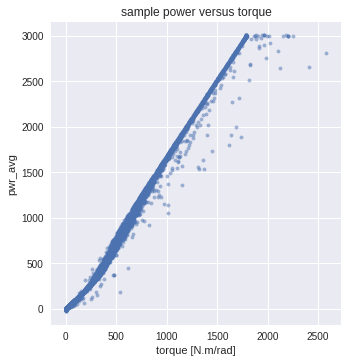

In [8]:
# Inputs
X = wtg_df.sample(n=10000, random_state=10)
mask = (X['filt_firt_ala'] == 1) & (X['filt_ok_time'] == 1)

# plt.figure(figsize=(10, 12))
sns.lmplot(x="torque", y="pwr_avg", data=X.loc[mask,:], 
           fit_reg=False, legend=False, palette="seismic_r", scatter_kws={"s":15, 'alpha':0.50})
plt.title("sample power versus torque")
plt.xlabel("torque [N.m/rad]")
plt.show()

In [0]:
# rescale col (to compute distance)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

col_to_ignor = ["filt_ok_time", "filt_firt_ala", "ok_time", "firt_ala"]

for feat_name in wtg_df.drop(col_to_ignor, axis=1).columns:
    feat_name_scal = feat_name + "_sca"
    X = wtg_df[feat_name]
    wtg_df[feat_name_scal] = (X - np.nanmean(X, axis=0))/np.nanstd(X, axis=0) 

In [10]:
# DBSCAN filtering turbine 13
from sklearn.model_selection import KFold
from sklearn.cluster import DBSCAN

batch_size = 30000
dbscan = DBSCAN(eps=0.04, min_samples=20)
wtg_df["valid"] = 0

output_path = "/content/gdrive/My Drive/Colab Notebooks/wind_power/data/1.clean_files/"
wtgs = wtg_df.index.levels[0].tolist()

for wtg in wtgs:
    # Extract specific wtg df
    X_wtg = wtg_df.loc[(wtg,),:]
    X_wtg["dbscan"] = 0
    mask = (X_wtg['filt_firt_ala'] == 1) & (X_wtg['filt_ok_time'] == 1)
    X_wtg_ok = X_wtg.loc[mask,:]

    # KFold index groups 
    n_split = X_wtg_ok.shape[0]//30000
    kf = KFold(n_splits=n_split, shuffle=True)    # shuffle a voir: peu filtrer les mode de bridage...
    idx_kFold = [] 
    for train_index, test_index in kf.split(X_wtg_ok):   # /!\ return iloc index
        idx_kFold.append(X_wtg_ok.index[test_index])     # extract and convert to .loc index

        
    # DBSCAN
    for idxs in idx_kFold:  
        X = X_wtg.loc[idxs,:]
        y_pred = dbscan.fit_predict(X.loc[:,["torque_sca", "pwr_avg_sca"]])
        X_wtg.loc[idxs, "dbscan"] = y_pred

    mask = X_wtg["dbscan"] == 0     # 0 = biggest / good group
    X_wtg.loc[mask,"dbscan"] = 1    # reassignement to have 1 as valid
    X_wtg.loc[~mask,"dbscan"] = 0

    # valid col = no diseable by any filter
    X_wtg["valid"] = X_wtg.loc[:,["filt_ok_time","filt_firt_ala","dbscan"]].min(axis=1)
    X_wtg["valid"].value_counts()

    
    # write to file
    selection = ["ws_avg", "ws_std", "wd_avg", "pwr_avg", "temp_avg", 
                 "pitch_avg", "rpm_avg", "valid"]
    begin_date = X_wtg.index.min()
    begin_date = begin_date.strftime('%Y%m%d')
    end_date = X_wtg.index.max()
    end_date = end_date.strftime('%Y%m%d')
    out_file_name = "{}_{}-{}_c.csv" .format(wtg, begin_date, end_date)
    X_wtg.loc[:,selection].to_csv(output_path + out_file_name)

    
    # add result to main wtg_df
    X_wtg["wtg"] = wtg
    X_wtg.set_index(["wtg", X_wtg.index], inplace=True)   # Multi-indexing mandatory
    wtg_df.loc[(wtg,),"valid"] = X_wtg["valid"]

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1367: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a 

In [11]:
X_wtg.columns

Index(['ws_avg', 'ws_std', 'wd_avg', 'pwr_avg', 'firt_ala', 'temp_avg',
       'ok_time', 'pitch_avg', 'rpm_avg', 'filt_ok_time', 'filt_firt_ala',
       'torque', 'ws_avg_sca', 'ws_std_sca', 'wd_avg_sca', 'pwr_avg_sca',
       'temp_avg_sca', 'pitch_avg_sca', 'rpm_avg_sca', 'torque_sca', 'valid',
       'dbscan'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1367: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


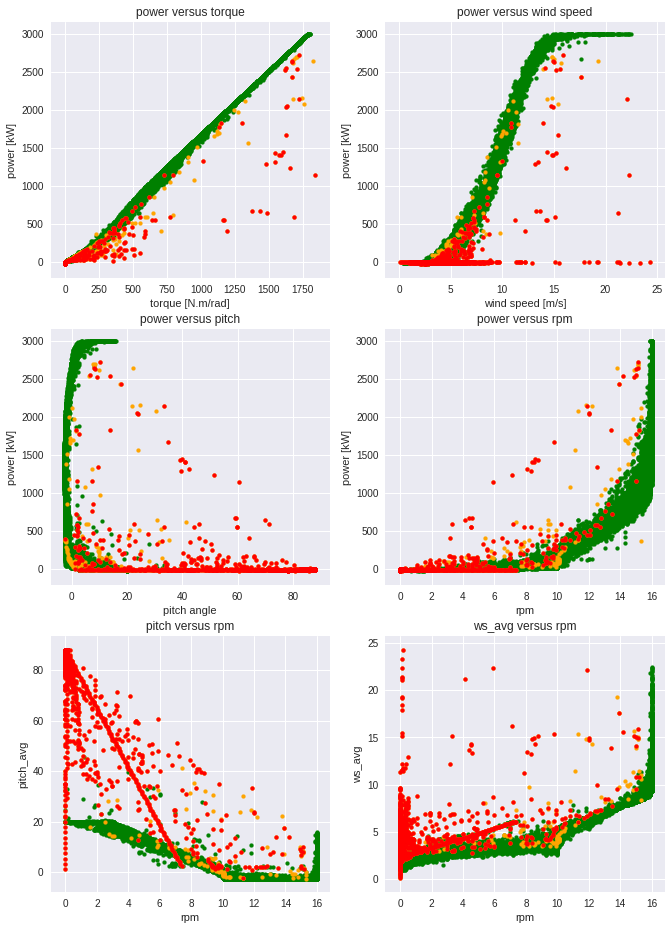

In [12]:
# Inputs

# X = X_wtg.loc[("WT21",),:]
X = wtg_df.loc[("WT23",),:]
X = X.loc["2016-06-01 00:00:00":"2017-06-01 00:00:00"]
mask_fil_ala = (X['filt_firt_ala'] == 1)
mask_fil_runt = (X['filt_ok_time'] == 1)
# mask_fil_db = (X['dbscan'] == 1)
mask_fil_val = (X['valid'] == 1)

# Plot
plt.figure(figsize=(11, 16))
plt.subplot(3, 2, 1)
plt.scatter(x='torque', y='pwr_avg', data=X.loc[mask_fil_val,:],s=15, alpha=1, c="g")
plt.scatter(x='torque', y='pwr_avg', data=X.loc[~mask_fil_val,:],s=15, alpha=1, c="orange")
plt.scatter(x='torque', y='pwr_avg', data=X.loc[~mask_fil_ala,:],s=15, alpha=1, c="r")
plt.title("power versus torque")
plt.xlabel("torque [N.m/rad]")
plt.ylabel("power [kW]")

plt.subplot(3, 2, 2)
plt.scatter(x='ws_avg', y='pwr_avg', data=X.loc[mask_fil_val,:],s=15, alpha=1, c="g")
plt.scatter(x='ws_avg', y='pwr_avg', data=X.loc[~mask_fil_val,:],s=15, alpha=1, c="orange")
plt.scatter(x='ws_avg', y='pwr_avg', data=X.loc[~mask_fil_ala,:],s=15, alpha=1, c="r")
plt.title("power versus wind speed")
plt.xlabel("wind speed [m/s]")
plt.ylabel("power [kW]")

plt.subplot(3, 2, 3)
plt.scatter(x='pitch_avg', y='pwr_avg', data=X.loc[mask_fil_val,:],s=15, alpha=1, c="g")
plt.scatter(x='pitch_avg', y='pwr_avg', data=X.loc[~mask_fil_val,:],s=15, alpha=1, c="orange")
plt.scatter(x='pitch_avg', y='pwr_avg', data=X.loc[~mask_fil_ala,:],s=15, alpha=1, c="r")
plt.title("power versus pitch")
plt.xlabel("pitch angle")
plt.ylabel("power [kW]")

plt.subplot(3, 2, 4)
plt.scatter(x='rpm_avg', y='pwr_avg', data=X.loc[mask_fil_val,:],s=15, alpha=1, c="g")
plt.scatter(x='rpm_avg', y='pwr_avg', data=X.loc[~mask_fil_val,:],s=15, alpha=1, c="orange")
plt.scatter(x='rpm_avg', y='pwr_avg', data=X.loc[~mask_fil_ala,:],s=15, alpha=1, c="r")
plt.title("power versus rpm")
plt.xlabel("rpm")
plt.ylabel("power [kW]")

plt.subplot(3, 2, 5)
plt.scatter(x='rpm_avg', y='pitch_avg', data=X.loc[mask_fil_val,:],s=15, alpha=1, c="g")
plt.scatter(x='rpm_avg', y='pitch_avg', data=X.loc[~mask_fil_val,:],s=15, alpha=1, c="orange")
plt.scatter(x='rpm_avg', y='pitch_avg', data=X.loc[~mask_fil_ala,:],s=15, alpha=1, c="r")
plt.title("pitch versus rpm")
plt.xlabel("rpm")
plt.ylabel("pitch_avg")

plt.subplot(3, 2, 6)
plt.scatter(x='rpm_avg', y='ws_avg', data=X.loc[mask_fil_val,:],s=15, alpha=1, c="g")
plt.scatter(x='rpm_avg', y='ws_avg', data=X.loc[~mask_fil_val,:],s=15, alpha=1, c="orange")
plt.scatter(x='rpm_avg', y='ws_avg', data=X.loc[~mask_fil_ala,:],s=15, alpha=1, c="r")
plt.title("ws_avg versus rpm")
plt.xlabel("rpm")
plt.ylabel("ws_avg")
plt.show()

Text(0.5, 0, 'rpm')

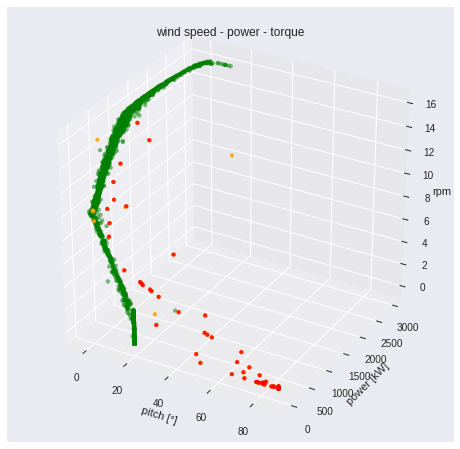

In [0]:
%matplotlib inline
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

X3 = X.sample(3000)


fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')
ax.scatter3D(xs=X3.loc[mask_fil_val,'pitch_avg']
             , ys=X3.loc[mask_fil_val,'pwr_avg']
             ,zs=X3.loc[mask_fil_val,"rpm_avg"],
             data=X3,s=15, alpha=0.5, c="g");

ax.scatter3D(xs=X3.loc[~mask_fil_val,'pitch_avg']
             , ys=X3.loc[~mask_fil_val,'pwr_avg']
             ,zs=X3.loc[~mask_fil_val,"rpm_avg"],
             data=X3,s=15, alpha=0.9, c="orange");

ax.scatter3D(xs=X3.loc[~mask_fil_ala,'pitch_avg']
             , ys=X3.loc[~mask_fil_ala,'pwr_avg']
             ,zs=X3.loc[~mask_fil_ala,"rpm_avg"],
             data=X3,s=15, alpha=0.8, c="red");
plt.title("wind speed - power - torque")
ax.set_xlabel("pitch [°]")
ax.set_ylabel("power [kW]")
ax.set_zlabel("rpm")

### 1.3.3 Feature engineering

In [0]:
# hours and month
wtg_df = wtg_df.reset_index(level="wtg")
wtg_df["hour"] = wtg_df.index.map(lambda x: x.hour)
wtg_df["month"] = wtg_df.index.map(lambda x: x.month)
wtg_df.set_index(["wtg", wtg_df.index], inplace=True)

# wind sector
wtg_df["sector"] = round(wtg_df["wd_avg"]/30,0) % 12

# wind speed bins
wtg_df["ws_bin"] = round(wtg_df["ws_avg"]*2,0)/2

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1367: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


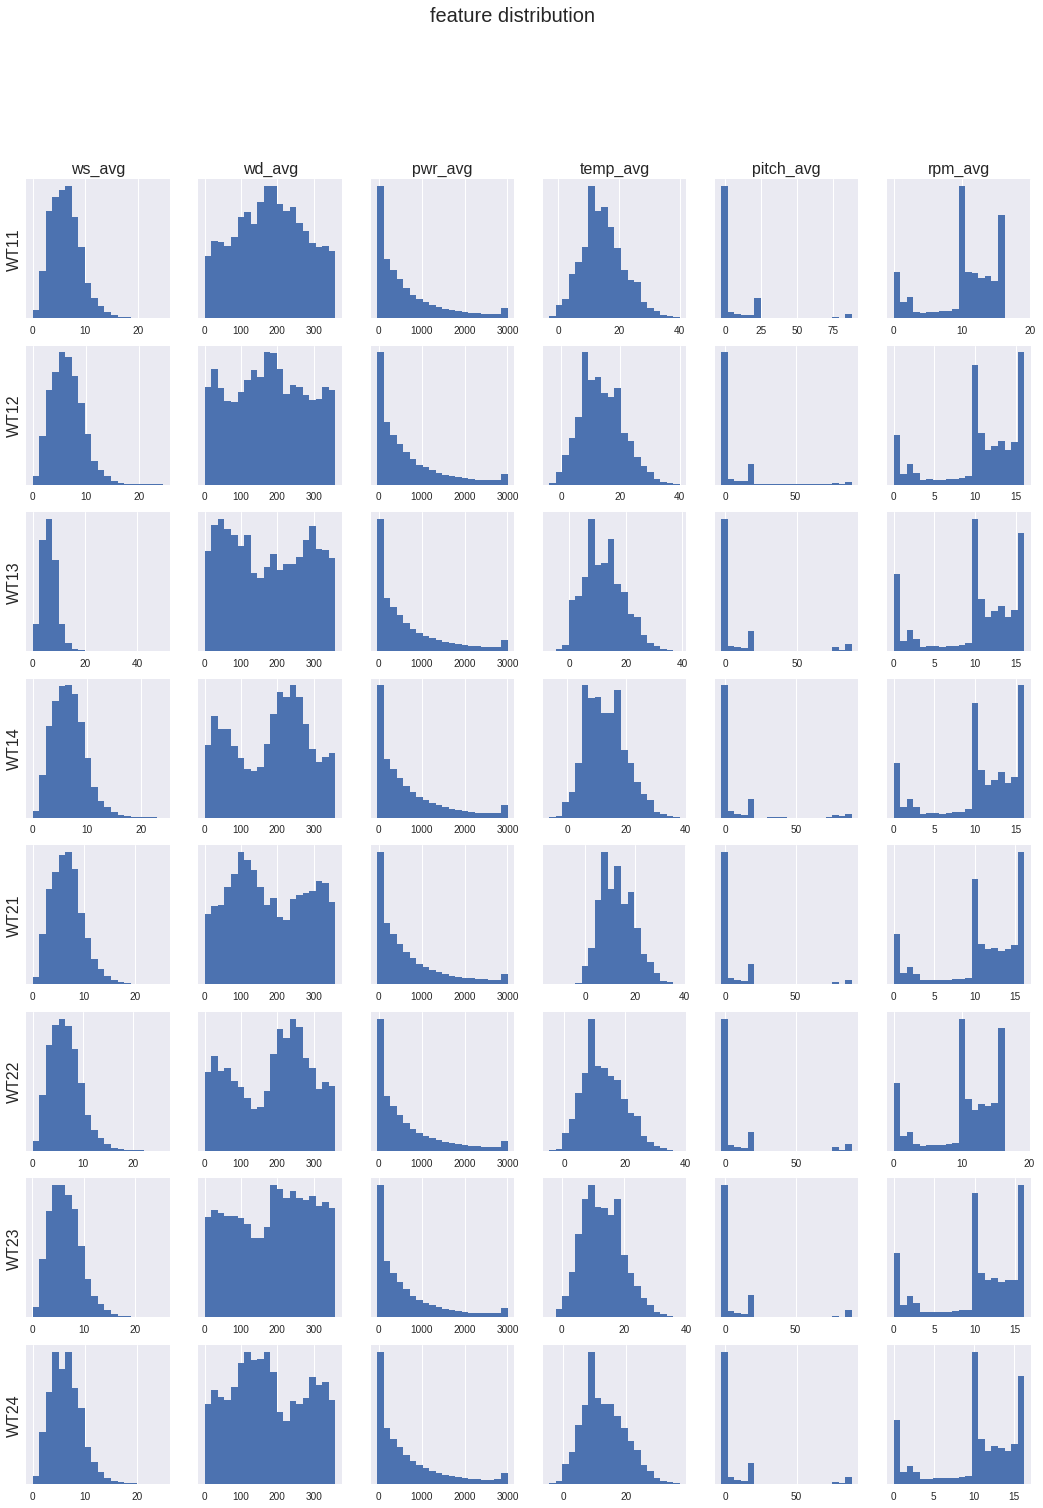

In [28]:
wtgs = wtg_df.index.levels[0].tolist()
n_wtgs = len(wtgs)
feat_2_plot = ["ws_avg", "wd_avg", "pwr_avg", "temp_avg", "pitch_avg", "rpm_avg"]
n_features = len(feat_2_plot)
plt.figure(figsize=(n_features*3, n_wtgs*3))
plt.suptitle("Feature distribution", size = 20)
i = 1

for wtg in wtgs:
    X_wtg = wtg_df.loc[(wtg,),feat_2_plot]  
    for feature in feat_2_plot:
        plt.subplot(n_wtgs, n_features, i)
        if wtg == wtgs[0] :
            plt.title(feature, size=16)
        if i % n_features == 1:
            plt.ylabel(wtg, size=16)
        i = i + 1
        plt.hist(X_wtg[feature], bins=20)
        plt.yticks([])
        
plt.show()

In [22]:
# Some multi variables

wtgs = wtg_df.index.levels[0].tolist()
n_wtgs = len(wtgs)
feat_2_plot = ["ws_avg", "wd_avg", "pwr_avg", "temp_avg", "pitch_avg", "rpm_avg"]
n_features = len(feat_2_plot)
plt.figure(figsize=(n_features*3, n_wtgs*3))
plt.suptitle("Feature distribution", size = 20)
i = 1

for wtg in wtgs:
    X_wtg = wtg_df.loc[(wtg,),feat_2_plot]  
    for feature in feat_2_plot:
        plt.subplot(n_wtgs, n_features, i)
        if wtg == wtgs[0] :
            plt.title(feature, size=16)
        if i % n_features == 1:
            plt.ylabel(wtg, size=16)
        i = i + 1
        plt.hist(X_wtg[feature], bins=20)
        plt.yticks([])
        
plt.show()

1

In [122]:
mask = wtg_df["valid"] == 1
A = wtg_df.loc[mask,:].unstack(level=0)
A.head()

ws_avg                                            \
wtg                         WT11  WT12  WT13  WT14  WT21  WT22  WT23  WT24   
Date                                                                         
2012-12-31 23:20:00+00:00   10.7  11.1  10.8  11.8  12.0  11.0  11.8  11.6   
2012-12-31 23:30:00+00:00   10.8  11.3  11.1  12.0  11.9  11.1  11.7  11.7   
2012-12-31 23:40:00+00:00   10.8  11.4  11.4  12.0  11.8  11.2  11.8  11.9   
2012-12-31 23:50:00+00:00   10.5  11.3  11.1  11.7  12.1  11.3  11.7  11.8   
2013-01-01 00:00:00+00:00   10.0  10.8  10.6  11.3  12.2  10.8  11.1  11.0   

                          ws_std       ...  sector      ws_bin              \
wtg                         WT11 WT12  ...    WT23 WT24   WT11  WT12  WT13   
Date                                   ...                                   
2012-12-31 23:20:00+00:00    1.3  1.4  ...     6.0  5.0   10.5  11.0  11.0   
2012-12-31 23:30:00+00:00    1.1  1.6  ...     6.0  5.0   11.0  11.5  11.0   
2012-12-31 23:40:00+00:00    1.1  1.4  ...     5.0  5.0   11.0  11.5  11.5   
2012-12-31 23:50:00+00:00    1.2  1.3  ...     5.0  5.0   10.5  11.5  11.0   
2013-01-01 00:00:00+00:00    1.1  1.3  ...     5.0  5.0   10.0  11.0  10.5   

                                                         
wtg                        WT14  WT21  WT22  WT23  WT24  
Date                                                     
2012-12-31 23:20:00+00:00  12.0  12.0  11.0  12.0  11.5  
2012-12-31 23:30:00+00:00  12.0  12.0  11.0  11.5  11.5  
2012-12-31 23:40:00+00:00  12.0  12.0  11.0  12.0  12.0  
2012-12-31 23:50:00+00:00  11.5  12.0  11.5  11.5  12.0  
2013-01-01 00:00:00+00:00  11.5  12.0  11.0  11.0  11.0  

[5 rows x 200 columns]

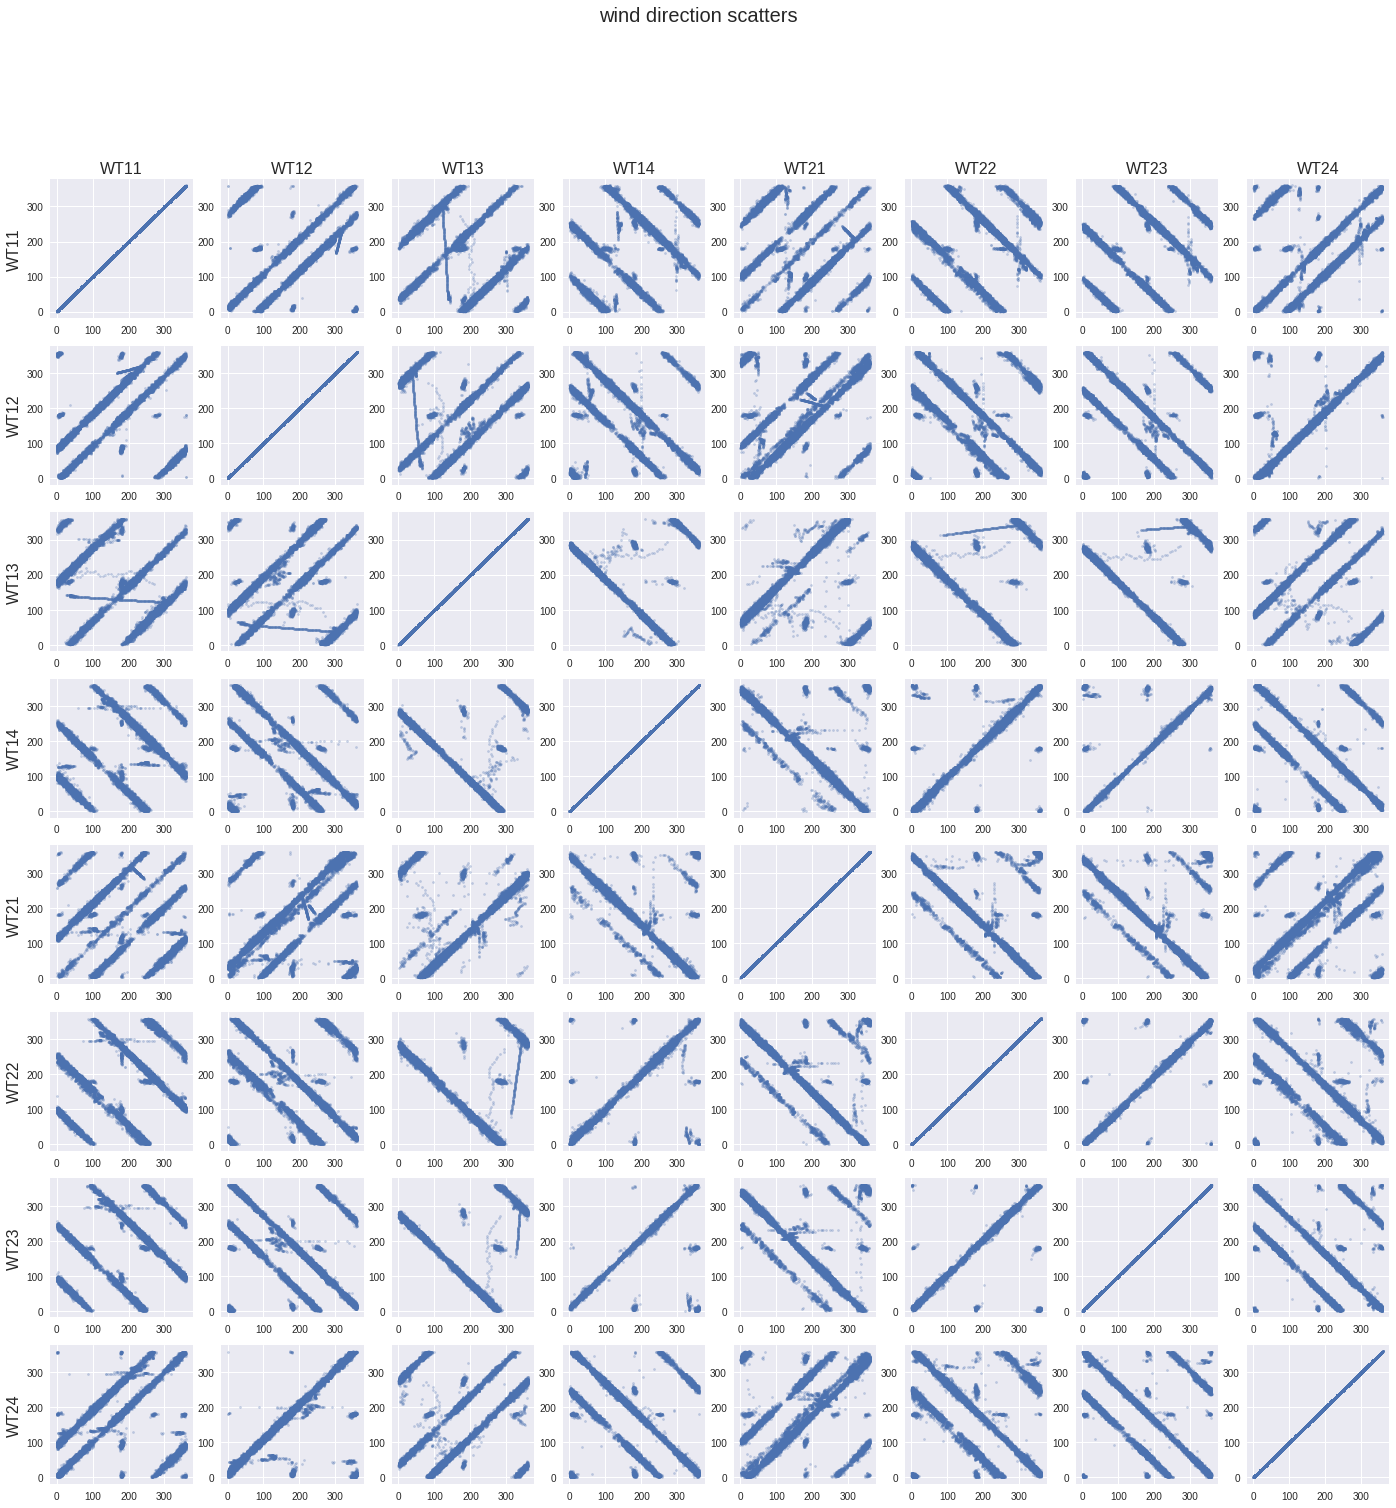

In [124]:
# multi var plots

# Inputs
start = "2016-01-01 00:00:00"
end = "2016-12-30 00:00:00"
B = A.loc[start:end,:]
mask = B.loc[:,("ws_avg","WT11")] > 5


# wtgs = wtg_df.index.levels[0].tolist()
wtgs = ['WT11', 'WT12', 'WT13', 'WT14', 'WT21', 'WT22', 'WT23', 'WT24']
n_wtgs = len(wtgs)


feature= ["wd_avg"]

plt.figure(figsize=(n_wtgs*3, n_wtgs*3))
plt.suptitle("wind direction scatters", size = 20)

n = 1
for i, wtg1 in enumerate(wtgs):

    for j, wtg2 in enumerate(wtgs):           
        plt.subplot(n_wtgs, n_wtgs, n )
        plt.scatter(x=B.loc[mask,(feature, wtg1)],
                    y=B.loc[mask,(feature, wtg2)],
                    alpha=0.3,
                    s=5)
        if i == 0 :
            plt.title(wtg2, size=16)
        if j == 0 :
            plt.ylabel(wtg1, size=16)
         
        n = n + 1
plt.show()

..........................................................................................................![OMG](https://images.ecosia.org/P5MG5x4INXyYvwLP5xS_Zr_HZ1M=/0x390/smart/http%3A%2F%2Fclipart.info%2Fimages%2Fccovers%2F1496184260OMG-Emoji-Png-transparent-background.png)



In [0]:
# extract and format ERA data 
era_dir = era_df.loc[:,["dir_agv_10m", "dir_agv_100m", "ws_avg_100m"]]

# add time zone information (for have same time stamp format than wtg df) 
ts = era_dir.index
ts_GTM = ts.tz_localize("GMT")
era_dir.index = ts_GTM
del ts, ts_GTM

In [140]:
# sample wtg data at integers hours
Hourly_sample = A.loc["2013-01-01 00:00:00+00:00":,].asfreq("H")  # sample only hours time stamp
Hourly_sample = Hourly_sample.loc[:,("wd_avg")]
Hourly_sample.head()

wtg,WT11,WT12,WT13,WT14,WT21,WT22,WT23,WT24
Date,,,,,,,,
2013-01-01 00:00:00+00:00,159.0,167.0,164.0,210.0,141.0,139.0,160.0,158.0
2013-01-01 01:00:00+00:00,166.0,168.0,171.0,213.0,148.0,144.0,168.0,161.0
2013-01-01 02:00:00+00:00,158.0,167.0,161.0,206.0,133.0,141.0,153.0,153.0
2013-01-01 03:00:00+00:00,148.0,154.0,156.0,197.0,NaN,127.0,151.0,148.0
2013-01-01 04:00:00+00:00,139.0,149.0,144.0,191.0,116.0,122.0,142.0,139.0


In [166]:
# merge
directions_data = pd.merge(Hourly_sample, era_dir, how = "left", left_index=True, right_index=True)
directions_data.head(3)

,WT11,WT12,WT13,WT14,WT21,WT22,WT23,WT24,dir_agv_10m,dir_agv_100m,ws_avg_100m
Date,,,,,,,,,,,
2013-01-01 00:00:00+00:00,159.0,167.0,164.0,210.0,141.0,139.0,160.0,158.0,208.6,210.6,11.67
2013-01-01 01:00:00+00:00,166.0,168.0,171.0,213.0,148.0,144.0,168.0,161.0,210.5,212.3,11.80
2013-01-01 02:00:00+00:00,158.0,167.0,161.0,206.0,133.0,141.0,153.0,153.0,213.9,215.1,11.93


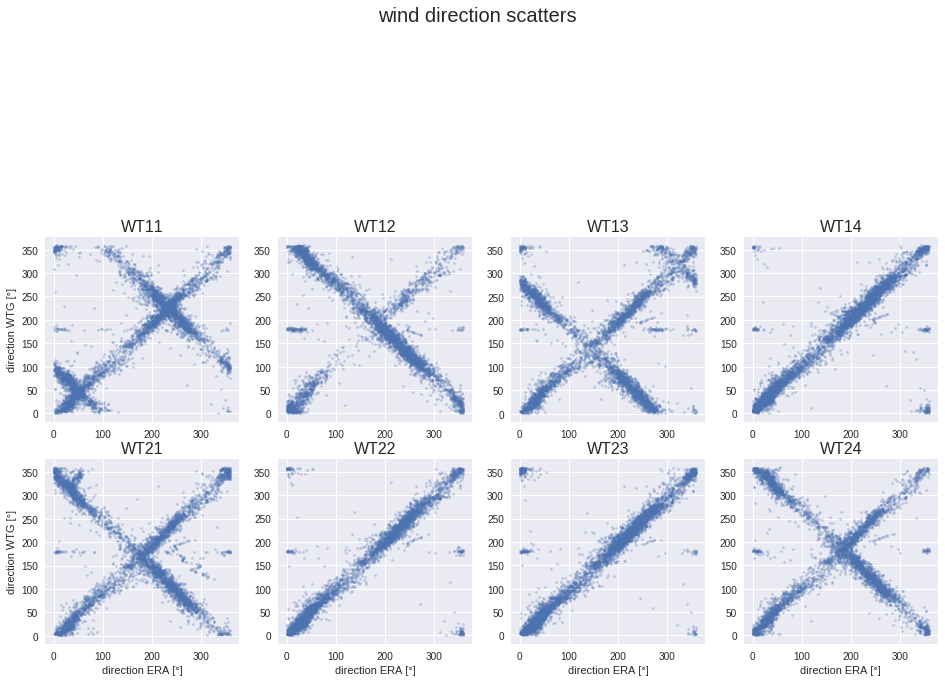

In [192]:
# multi var plots

# Inputs
start = "2018-01-01 00:00:00"
end = "2018-12-30 00:00:00"

X = directions_data.loc[start:end,:]
mask = X.loc[:,"ws_avg_100m"] > 5
X = X.loc[mask,:]

# wtgs = wtg_df.index.levels[0].tolist()
wtgs = ['WT11', 'WT12', 'WT13', 'WT14', 'WT21', 'WT22', 'WT23', 'WT24']
n_wtgs = len(wtgs)

plt.figure(figsize=(4*4, n_wtgs*4))
plt.suptitle("wind direction scatters", size = 20)

for i, wtg in enumerate(wtgs):
    n = i+1
    plt.subplot(n_wtgs, 4, n)
    plt.scatter(x=X.loc[:,"dir_agv_100m"],
                y=X.loc[:,wtg],
                alpha=0.3,
                s=5)
    plt.title(wtg, size=16)
    
    if n in [1, 5]:
        plt.ylabel("direction WTG [°]")
    if n in [5, 6, 7, 8] :
        plt.xlabel("direction ERA [°]")     
plt.show()

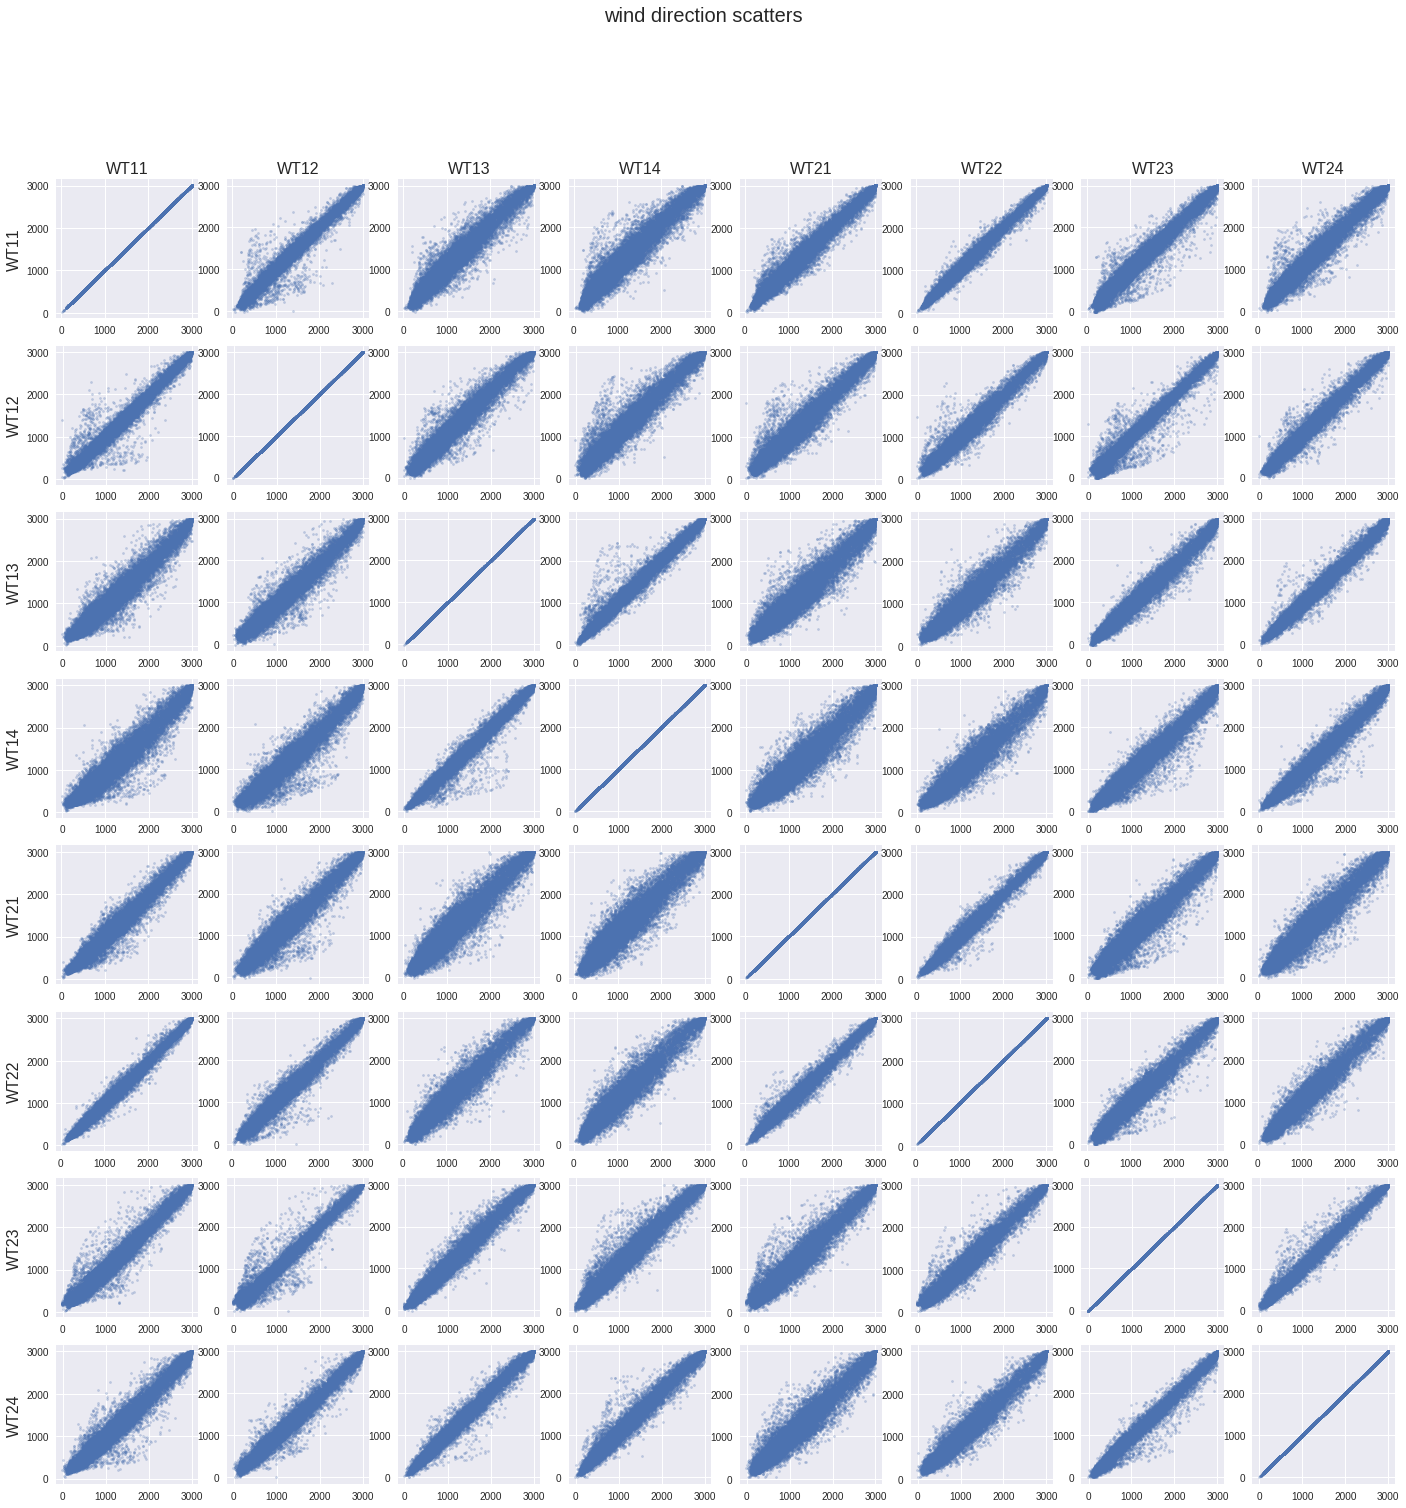

In [194]:
# Prod

# Inputs
start = "2018-01-01 00:00:00"
end = "2018-12-30 00:00:00"
B = A.loc[start:end,:]
mask = B.loc[:,("ws_avg","WT11")] > 5


# wtgs = wtg_df.index.levels[0].tolist()
wtgs = ['WT11', 'WT12', 'WT13', 'WT14', 'WT21', 'WT22', 'WT23', 'WT24']
n_wtgs = len(wtgs)


feature= ["pwr_avg"]

plt.figure(figsize=(n_wtgs*3, n_wtgs*3))
plt.suptitle("wind direction scatters", size = 20)

n = 1
for i, wtg1 in enumerate(wtgs):
    for j, wtg2 in enumerate(wtgs):           
        plt.subplot(n_wtgs, n_wtgs, n)
        plt.scatter(x=B.loc[mask,(feature, wtg1)],
                    y=B.loc[mask,(feature, wtg2)],
                    alpha=0.3,
                    s=5)
        if i == 0 :
            plt.title(wtg2, size=16)
        if j == 0 :
            plt.ylabel(wtg1, size=16)
         
        n = n + 1
plt.show()

wtg,WT11,WT12,WT13,WT14,WT21,WT22,WT23,WT24
wtg,,,,,,,,
WT11,1.000000,0.990871,0.984054,0.980109,0.990086,0.995887,0.988796,0.986353
WT12,0.990871,1.000000,0.986431,0.981728,0.983709,0.989715,0.990931,0.991916
WT13,0.984054,0.986431,1.000000,0.992747,0.979401,0.983075,0.991505,0.994000
WT14,0.980109,0.981728,0.992747,1.000000,0.977011,0.981021,0.985738,0.991224
WT21,0.990086,0.983709,0.979401,0.977011,1.000000,0.994316,0.982482,0.981114


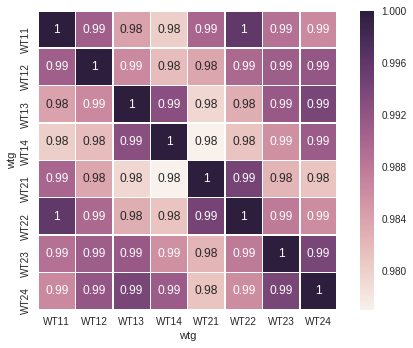

In [205]:
# correlation matrix o Pwr
import seaborn as sns
pwr = B.loc[:,("pwr_avg")]
corr = pwr.corr()
corr.head()
sns.heatmap(corr, square=True, annot=True, linewidth=0.5)

In [1]:
A.head()

NameError: ignored

direction from WT14 from 2014 to now is correct. We will use it as reference

In [74]:
# add wtg to index
A.set_index("Date", inplace=True)
A.head(3)

,wtg,ws_avg,ws_std,wd_avg,pwr_avg,firt_ala,temp_avg,ok_time,pitch_avg,rpm_avg,...,pwr_avg_sca,temp_avg_sca,pitch_avg_sca,rpm_avg_sca,torque_sca,valid,hour,month,sector,ws_bin
Date,,,,,,,,,,,,,,,,,,,,,
2012-12-31 23:10:00+00:00,WT14,11.6,1.4,NaN,2696.0,NaN,NaN,0.0,NaN,NaN,...,2.708855,NaN,NaN,NaN,-0.577217,0,23,12,NaN,11.5
2012-12-31 23:20:00+00:00,WT14,11.8,1.5,210.0,2745.0,0.0,8.0,600.0,-0.9,16.0,...,2.773711,-0.749229,-0.338958,1.102383,1.555503,1,23,12,7.0,12.0
2012-12-31 23:30:00+00:00,WT14,12.0,1.6,210.0,2779.0,0.0,8.0,600.0,-0.5,16.0,...,2.818713,-0.749229,-0.318285,1.102383,1.581919,1,23,12,7.0,12.0


In [0]:
# add wtg to index
wtg_df.set_index(["wtg", wtg_df.index], inplace=True)
wtg_df.head(3)

In [0]:
wtg_df = wtg_df.sort_index()

In [0]:
dbscan.

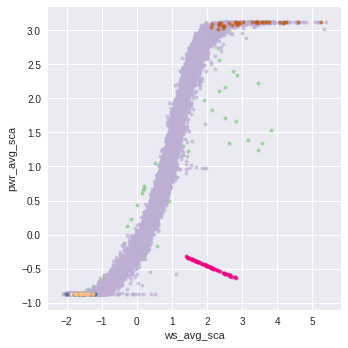

In [0]:
sns.lmplot(x="ws_avg_sca", y="pwr_avg_sca", data=X, 
            fit_reg=False, hue="db_clust", legend=False, palette="Accent", scatter_kws={"s":15, 'alpha':0.70})

In [0]:
X["db_clust"].value_counts()

 0    29440
-1      317
 4       74
 5       41
 2       30
 7       19
 6       17
 3       17
 9       16
 1       16
 8       13
Name: db_clust, dtype: int64

In [0]:
X.columns

Index(['ws_avg', 'ws_std', 'wd_avg', 'pwr_avg', 'firt_ala', 'temp_avg',
       'ok_time', 'pitch_avg', 'rpm_avg', 'filt_ok_time', 'filt_firt_ala',
       'torque', 'ws_avg_sca', 'ws_std_sca', 'wd_avg_sca', 'pwr_avg_sca',
       'temp_avg_sca', 'pitch_avg_sca', 'rpm_avg_sca', 'torque_sca',
       'db_clust'],
      dtype='object')

Outlier detection
The training data contains outliers which are defined as observations that are far from the others. Outlier detection estimators thus try to fit the regions where the training data is the most concentrated, ignoring the deviant observations.

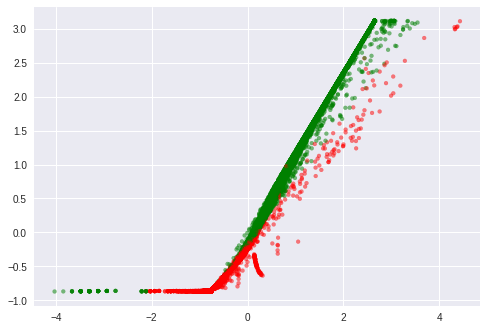

In [0]:

from sklearn import svm

SVM = svm.OneClassSVM(nu=0.08, kernel="linear", gamma=0.1)
y_pred = SVM.fit_predict(X.loc[:,["torque_sca", "pwr_avg_sca", 'ws_avg_sca', 'pitch_avg_sca']])
y_pred = pd.Series(y_pred)


colors = {-1:'red', 1:'green'}


plt.scatter(x="torque_sca", y="pwr_avg_sca", data=X.loc[:,["torque_sca", "pwr_avg_sca"]],s=15, alpha=0.5, c= y_pred.apply(lambda x: colors[x])) 
#        fit_reg=False, hue='filt_firt_ala', legend=False, palette="seismic_r", scatter_kws={"s":15, 'alpha':0.50}, size=4)


In [0]:
X.columns

Index(['ws_avg', 'ws_std', 'wd_avg', 'pwr_avg', 'firt_ala', 'temp_avg',
       'ok_time', 'pitch_avg', 'rpm_avg', 'filt_ok_time', 'filt_firt_ala',
       'torque', 'ws_avg_sca', 'ws_std_sca', 'wd_avg_sca', 'pwr_avg_sca',
       'temp_avg_sca', 'pitch_avg_sca', 'rpm_avg_sca', 'torque_sca',
       'db_clust'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


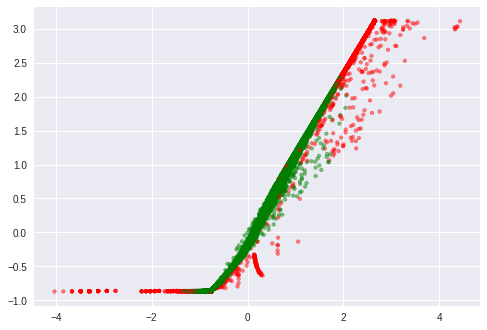

In [0]:
from sklearn.ensemble import IsolationForest
outliers_fraction = 0.01



Iso_For = IsolationForest(behaviour='new',random_state=42)
y_pred = Iso_For.fit_predict(X.loc[:,["torque_sca", "pwr_avg_sca", "pitch_avg_sca", "ws_avg_sca"]])
y_pred = pd.Series(y_pred)


colors = {-1:'red', 1:'green'}


plt.scatter(x='torque_sca', y='pwr_avg_sca', data=X.loc[:,["torque_sca", "pwr_avg_sca"]],s=15, alpha=0.5, c= y_pred.apply(lambda x: colors[x])) 
#        fit_reg=False, hue='filt_firt_ala', legend=False, palette="seismic_r", scatter_kws={"s":15, 'alpha':0.50}, size=4)

/usr/local/lib/python3.6/dist-packages/sklearn/neighbors/lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


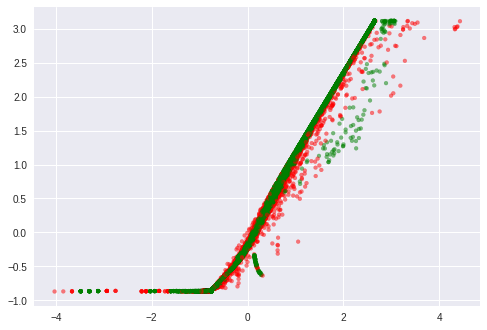

In [0]:
from sklearn.neighbors import LocalOutlierFactor




loc_out = LocalOutlierFactor(n_neighbors=15, algorithm = "kd_tree")
y_pred = loc_out.fit_predict(X.loc[:,["torque_sca", "pwr_avg_sca"]])
y_pred = pd.Series(y_pred)


colors = {-1:'red', 1:'green'}


plt.scatter(x='torque_sca', y='pwr_avg_sca', data=X.loc[:,["torque_sca", "pwr_avg_sca"]],s=15, alpha=0.5, c= y_pred.apply(lambda x: colors[x])) 
#        fit_reg=False, hue='filt_firt_ala', legend=False, palette="seismic_r", scatter_kws={"s":15, 'alpha':0.50}, size=4)


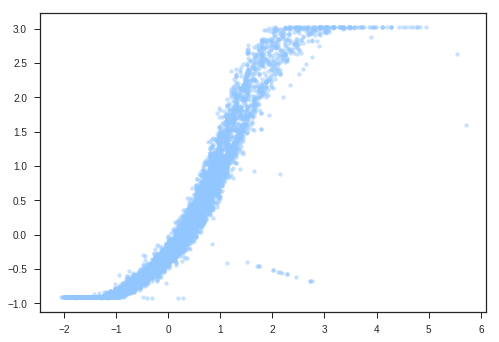

In [0]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scal =scaler.fit_transform(X.loc[mask,["ws_avg","pwr_avg"]])

plt.scatter(x=X_scal[:,0], y=X_scal[:,1],s=15, alpha=0.5) 

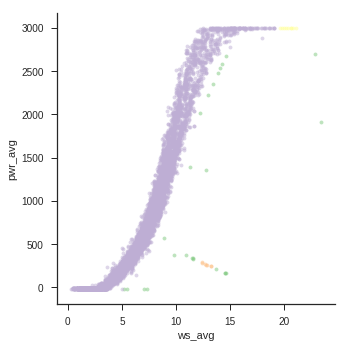

In [0]:
dbscan = DBSCAN(eps=0.15, min_samples=5).fit(X_scal)
labels = dbscan.labels_

X_temp = X.loc[mask,["ws_avg","pwr_avg"]].copy()
X_temp["labels"] = labels

sns.lmplot(x="ws_avg", y="pwr_avg", data=X_temp, 
            fit_reg=False, hue="labels", legend=False, palette="Accent", scatter_kws={"s":15, 'alpha':0.50})

array([0])

In [0]:
X_scal[:,0]

array([ 0.83245283, -0.85071643, -0.31210227, ..., -1.12002352,
       -1.05269675, -0.74972628])

# 2.0 Exploration

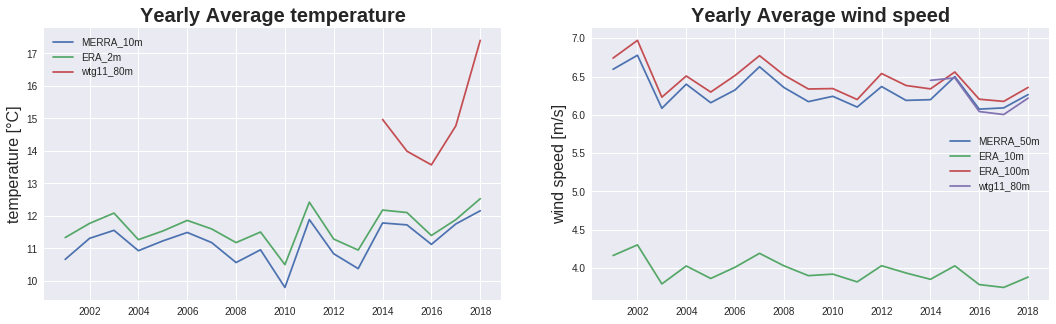

In [0]:
# plot yearly average
yearly_merra_df = merra_df.resample("AS").mean()
yearly_era_df = era_df.resample("AS").mean()
yearly_wtg11_df = wtg11_df.loc["2014-01-01 00:00:00":"2018-12-31 23:50:00",:].resample("AS").mean()


plt.figure(figsize=(18,5))
plt.subplot(1, 2, 1)
plt.plot(yearly_df.index, yearly_df["temp_avg_10m"], label="MERRA_10m")
plt.plot(yearly_era_df.index, yearly_era_df["temp_avg_2m"], label="ERA_2m")
plt.plot(yearly_wtg11_df.index, yearly_wtg11_df["temp_avg_80m"], label="wtg11_80m")
plt.title("Yearly Average temperature", fontweight="bold", size=20)
plt.ylabel("temperature [°C]", size=16)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(yearly_df.index, yearly_df["ws_avg_50m"], label="MERRA_50m")
plt.plot(yearly_era_df.index, yearly_era_df["ws_avg_10m"], label="ERA_10m")
plt.plot(yearly_era_df.index, yearly_era_df["ws_avg_100m"], label="ERA_100m")
plt.plot(yearly_wtg11_df.index, yearly_wtg11_df["ws_avg_80m"], label="wtg11_80m")
plt.title("Yearly Average wind speed", fontweight="bold", size=20)
plt.ylabel("wind speed [m/s]", size=16)
plt.legend()

plt.show()

In [0]:
def recovery_table(df, feature, title="recovery rate "):
  """plot recovery rate for each day
  - df: Data_frame, with a date index
  - feature: string, target feature name for recovery rate count
  """
  
  # inputs
  title = title + feature
  YM = df.index.map(lambda x: 100*x.year + x.month)
  d = df.index.day.values
  mat = df.pivot_table(index=YM, columns=d, 
                             aggfunc={feature: "count"}, dropna=True)

  # plot
  plt.figure(figsize=(18,35))
  sns.heatmap(mat, square=True, annot=True, fmt='g', linewidths=.5, 
              cmap= "PiYG", cbar=False)
  plt.title(title, fontweight="bold", size=20)
  plt.xlabel('day')
  plt.ylabel('year_month');
  plt.show()

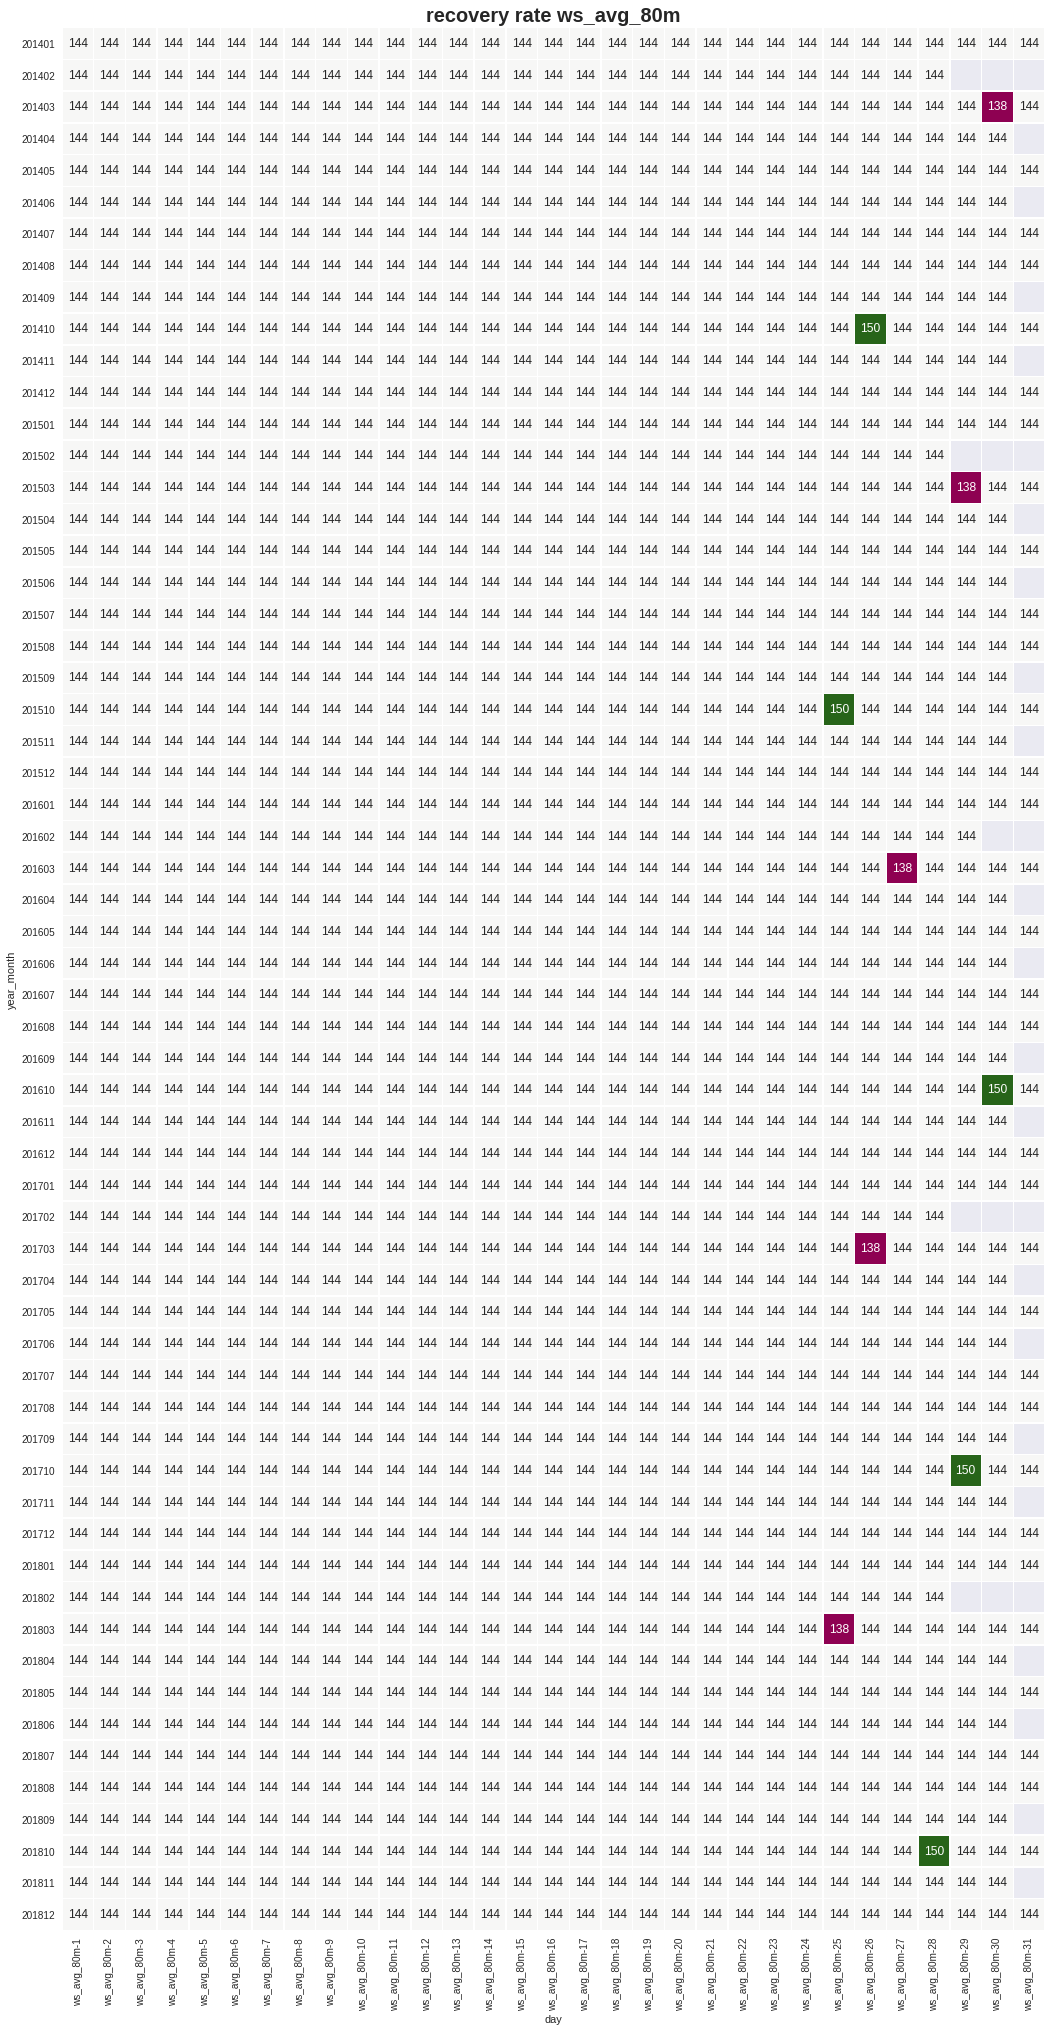

In [0]:
 recovery_table(wtg11_df, "ws_avg_80m")

We can see that:

*   Good recovery rate (no missing data)
*   All november have one days with 150 "10min records" (max at 144 for one day)
*   All October have one days with 138 "10min records".

This match the summer/winter local time change in France.  
This will need to be converted in order to be aligned with UTM.

In [0]:
# convert local wtg local time to GMT 
ts = pd.Series(wtg11_df.index)
ts_GTM = ts.dt.tz_localize("Europe/Paris",ambiguous = 'infer').dt.tz_convert("GMT")
wtg11_df.index = ts_GTM
del ts, ts_GTM

In [0]:
wtg11_df.head()

,ws_avg_80m,ws_std_80m,dir_agv_80m,prod_avg,first_alarm,temp_avg_80m
time_stamp,,,,,,
2013-12-31 23:00:00+00:00,7.1,0.70,136,643,0,13.5
2013-12-31 23:10:00+00:00,7.1,0.80,135,625,0,13.0
2013-12-31 23:20:00+00:00,7.7,0.85,138,805,0,13.0
2013-12-31 23:30:00+00:00,7.9,0.75,139,852,0,13.0
2013-12-31 23:40:00+00:00,8.0,0.70,135,841,0,13.0


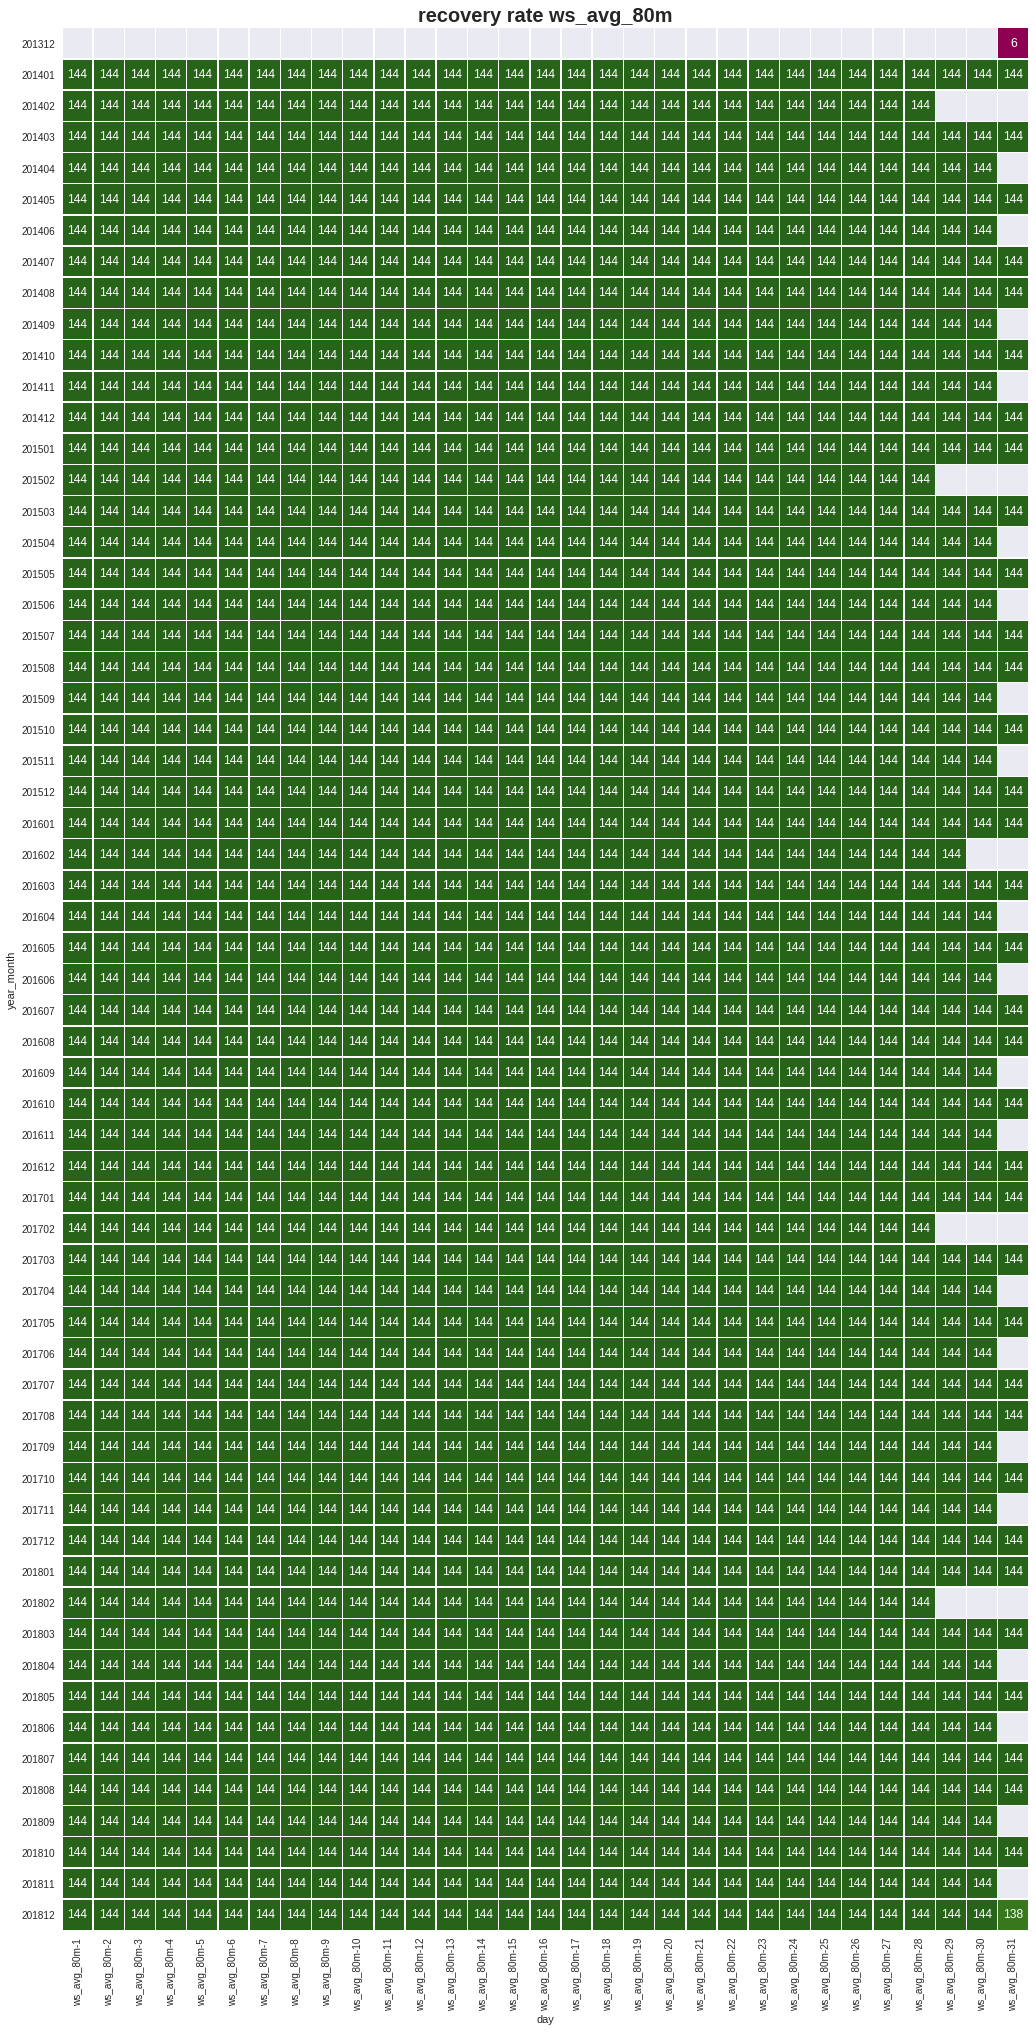

In [0]:
 recovery_table(wtg11_df, "ws_avg_80m")

In [0]:
wtg11_df["month"] = wtg11_df.index.map(lambda x: x.month)
wtg11_df["year"] = wtg11_df.index.map(lambda x: x.year)

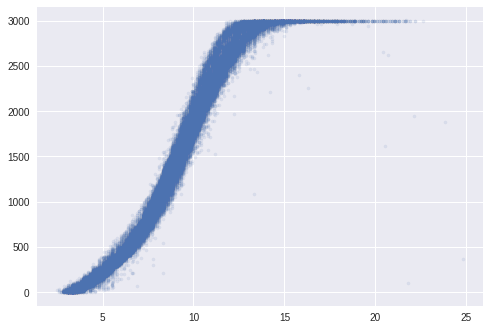

In [0]:
mask1 = wtg11_df.loc[:, 'first_alarm'] == 0
mask2 = wtg11_df.loc[:, 'year'].isin([2014])
mask2 = wtg11_df.loc[:, 'month'].isin([12, 1, 2])
mask3 = (wtg11_df.loc[:, 'prod_avg'] > 0)

mask = mask1 & mask2 & mask3 

plt.scatter('ws_avg_80m', 'prod_avg', data=wtg11_df.loc[mask,:], alpha = 0.1, s=10)

In [0]:
#Filtre
wtg11_df["hour"] = wtg11_df.index.map(lambda x: x.hour)
wtg11_df["filter"] = 0


,ws_avg_80m,ws_std_80m,dir_agv_80m,prod_avg,first_alarm,temp_avg_80m,month,year,hour
time_stamp,,,,,,,,,
2013-12-31 23:00:00+00:00,7.1,0.70,136,643,0,13.5,12,2013,23
2013-12-31 23:10:00+00:00,7.1,0.80,135,625,0,13.0,12,2013,23
2013-12-31 23:20:00+00:00,7.7,0.85,138,805,0,13.0,12,2013,23
2013-12-31 23:30:00+00:00,7.9,0.75,139,852,0,13.0,12,2013,23
2013-12-31 23:40:00+00:00,8.0,0.70,135,841,0,13.0,12,2013,23


/usr/local/lib/python3.6/dist-packages/pandas/core/computation/expressions.py:179: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


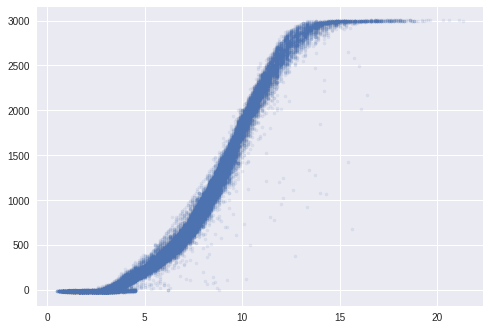

In [0]:
# Filter
wtg11_df["filter"] = 0

# filter bad data: 
mask1 = wtg11_df.loc[:,"first_alarm"] != 0
mask2 = (wtg11_df.loc[:, 'prod_avg'] < 0)*(wtg11_df.loc[:, "ws_avg_80m"] > 4.5)
mask = mask1 & mask2
wtg11_df.loc[mask, "filter"] = 1
mask5 = wtg11_df.loc[:, "filter"] == 0

# time filter for plot
mask3 = wtg11_df.loc[:, 'year'].isin([2015])
mask4 = wtg11_df.loc[:, 'month'].isin([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

mask =  mask3 & mask4 & mask5

plt.scatter('ws_avg_80m', 'prod_avg', data=wtg11_df.loc[mask,:], alpha = 0.1, s=10)

In [0]:
wtg11_df.head()

,ws_avg_80m,ws_std_80m,dir_agv_80m,prod_avg,first_alarm,temp_avg_80m,month,year,hour,filter
time_stamp,,,,,,,,,,
2013-12-31 23:00:00+00:00,7.1,0.70,136,643,0,13.5,12,2013,23,0
2013-12-31 23:10:00+00:00,7.1,0.80,135,625,0,13.0,12,2013,23,0
2013-12-31 23:20:00+00:00,7.7,0.85,138,805,0,13.0,12,2013,23,0
2013-12-31 23:30:00+00:00,7.9,0.75,139,852,0,13.0,12,2013,23,0
2013-12-31 23:40:00+00:00,8.0,0.70,135,841,0,13.0,12,2013,23,0


In [0]:
# create event_description dictionnary

path = "/content/gdrive/My Drive/Colab Notebooks/wind_power/data/"
filename = "adm_braking_list.csv"
file_path = path + filename
                       
break_list = pd.read_csv(file_path)
event_desc = pd.Series(break_list.event_description,
                       index=break_list.event_code.values).to_dict()

del break_list

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


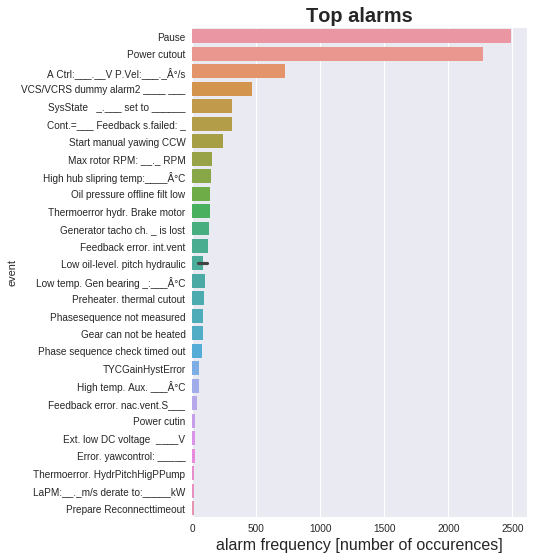

In [0]:
# First fault

top_n = 30

# inputs
A = wtg11_df.loc[:,"first_alarm"].value_counts()
A = pd.DataFrame(A)
A = A.rename(index=str, columns={"first_alarm": "count"})
A["event"] = A.index.map(lambda x: event_desc[int(x)])
A.head()


# plot
plt.figure(figsize=(6, 9))
sns.barplot(x= "count", y= "event", data=A.iloc[1:top_n,:])
plt.title("Top alarms", fontweight="bold", size=20)
plt.xlabel("alarm frequency [number of occurences]", size=16)
plt.show()

In [0]:
import plotly.plotly as py
import plotly.graph_objs as go


data = [go.Scatter(
          x=wtg11_df.index,
          y=wtg11_df['ws_avg_80m'])]

py.iplot(data)

/usr/local/lib/python3.6/dist-packages/plotly/plotly/plotly.py:230: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:
(1) Use the `plotly.graph_objs.Scattergl` trace object to generate a WebGl graph.
(2) Trying using the image API to return an image instead of a graph URL
(3) Use matplotlib
(4) See if you can create your visualization with fewer data points

If the visualization you're using aggregates points (e.g., box plot, histogram, etc.) you can disregard this warning.



Aw, snap! We didn't get a username with your request.

Don't have an account? https://plot.ly/api_signup

Questions? accounts@plot.ly


PlotlyError: ignored

In [0]:


mask1 = wtg11_df.loc[:, 'ws_avg_80m'] > 6
mask2 = wtg11_df.loc[:, 'prod_avg'] < 250
mask = mask1 & mask2
wtg11_df.loc[mask,:].head(50)

,ws_avg_80m,ws_std_80m,dir_agv_80m,prod_avg,first_alarm,temp_avg_80m
time_stamp,,,,,,
2014-02-01 08:30:00+00:00,6.4,0.75,142,158,0,17.0
2014-02-01 08:40:00+00:00,6.6,0.55,142,218,0,17.0
2014-02-07 04:30:00+00:00,23.4,2.95,150,-15,0,16.5
2014-02-07 04:40:00+00:00,21.8,2.95,150,103,0,16.5
2014-02-10 12:50:00+00:00,7.7,0.95,154,-15,0,16.3
2014-02-10 13:00:00+00:00,8.1,0.90,154,-12,0,16.3
2014-02-10 13:10:00+00:00,9.2,1.20,154,-8,0,16.3
2014-02-10 13:20:00+00:00,10.2,1.45,154,-5,0,16.3
2014-02-10 13:30:00+00:00,9.3,1.55,154,-7,0,16.3


In [0]:
True * False

0

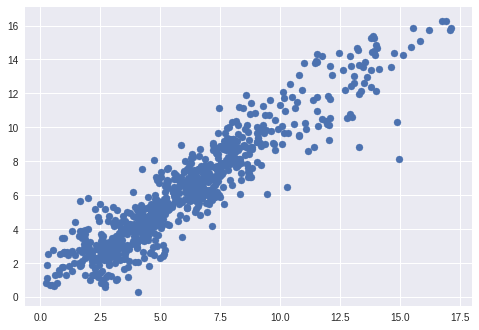

In [0]:
X = merra_df.loc["2013-01-01":"2013-02-01", "ws_avg_50m"]
Y = era_df.loc["2013-01-01":"2013-02-01", "ws_avg_100m"]

plt.scatter(X,Y)
  

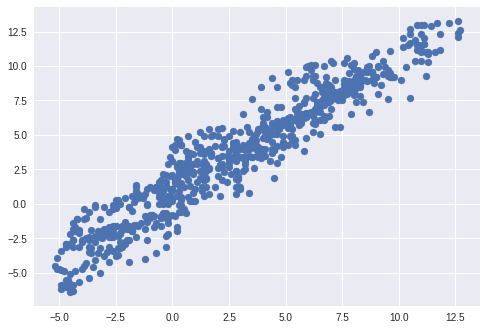

In [0]:
X = merra_df.loc["2013-01-01":"2013-02-01", "temp_avg_10m"]
Y = era_df.loc["2013-01-01":"2013-02-01", "temp_avg_2m"]

plt.scatter(X,Y)
  

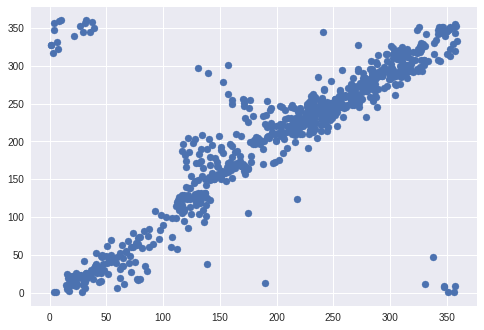

In [0]:
# direction

X = merra_df.loc["2013-01-01":"2013-02-01", "dir_agv_50m"]
Y = era_df.loc["2013-01-01":"2013-02-01", "dir_agv_100m"]

plt.scatter(X,Y)
  